# Código para Geração dos Diagramas Tensão x Deformação das Amostras - TCC - Reuso do Aço

#### Gabriel Valverde - Eng. Civil - Poli

In [1]:
#Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

#Ignorando warnings para diminuir a poluição do terminal
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lendo tabelas excel com os dados de tração (devem estar na mesma pasta do código)
df = pd.read_excel("EnsaioTracao_dataset.xlsx")
dfp = pd.read_excel("EnsaioTracaoPuro_dataset.xlsx")

In [4]:
df.columns

Index(['5_1_F', '5_1_D', '7_1_F', '7_1_D', '8_1_F', '8_1_D', '10_1_F',
       '10_1_D', '9_1_F', '9_1_D', '9_2_F', '9_2_D', '24_1_F', '24_1_D',
       '1_1_F', '1_1_D', '1_2_F', '1_2_D', '2_1_F', '2_1_D', '20_1_F',
       '20_1_D', '19_1_F', '19_1_D'],
      dtype='object')

In [3]:
#Definir os diâmetros de bitola de cada barra conforme aparecem nas colunas
bitolas=[6.3,6.3,6.3,8,12.5,12.5,12.5,16,16,16,16,22]

In [5]:
#Cálculo de áreas de cada barra
areas = []
for x in bitolas:
    area = (x**2)*np.pi/4
    areas.append(area)
areas = np.array(areas)
print(areas)

[ 31.17245311  31.17245311  31.17245311  50.26548246 122.71846303
 122.71846303 122.71846303 201.06192983 201.06192983 201.06192983
 201.06192983 380.13271108]


In [6]:
#Conversão dos valores de força dos DataFrames para tensão 
df_tensao= df.iloc[:,::2] * 1000 / (areas)
dfp_tensao= dfp.iloc[:,::2] * 1000 / (areas)

In [7]:
#Criando DataFrame cópia dos originais onde a força será substituida pelos valores calculados de tensão
df_t = df.copy()
dfp_t = dfp.copy()

In [8]:
#Substituindo os valores de força dos DataFrames para tensão
for x in range(0,12):
    x_t = x*2
    df_t.iloc[:,x_t] = df_tensao.iloc[:,x]
    dfp_t.iloc[:,x_t] = dfp_tensao.iloc[:,x]

In [9]:
# Função para plotar barras individualmente recebe (dataframe, 
# índice da barra desejada (0 a 11), observação a ser adicionada ao título)

def plot_bar(df, numbar=0, obs=""):
    plt.style.use('_mpl-gallery')
    barras = list(df.columns)
    ny = numbar*2
    nx = ny + 1

    plot_title = "Diagrama Tensão x Deformação - Barra " + barras[ny][0:-2]
    fig_title = barras[ny][0:-2]
    if obs != "":
        plot_title = plot_title + " " + obs
        fig_title = fig_title + obs[1]
    
    #Plotando
    g = df.plot(x=barras[nx], y=barras[ny], xlabel="Deformação (mm)", \
                ylabel="Tensão (MPa)", title=plot_title, figsize=(6,3), legend=None).get_figure()
    
    #Salvando gráfico já nomeado na pasta do código
    g.savefig(fig_title, bbox_inches="tight")


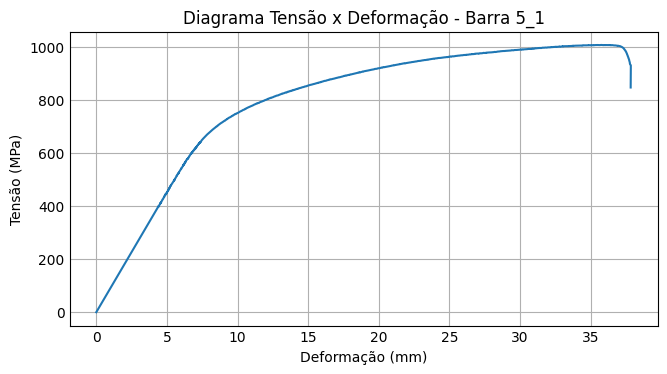

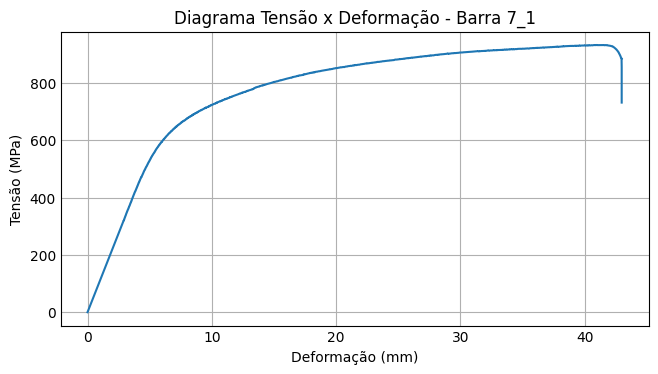

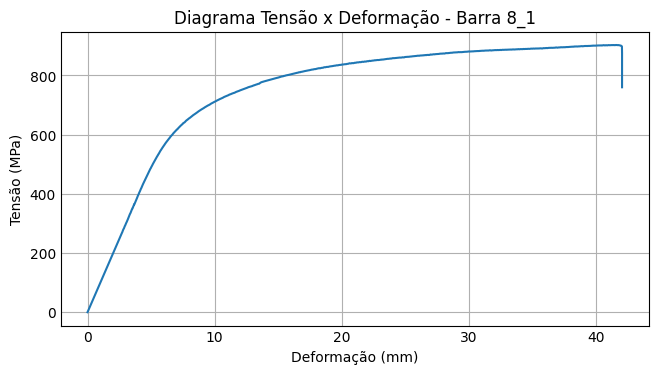

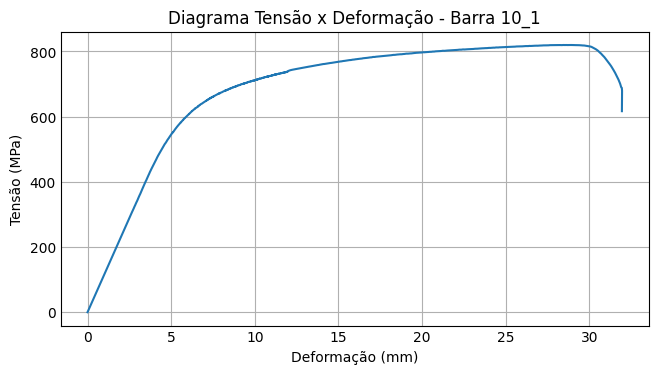

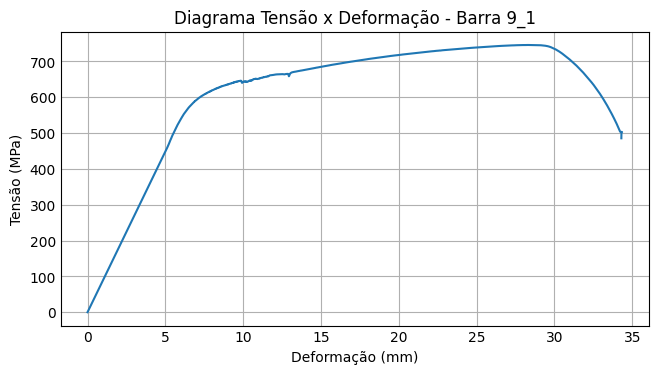

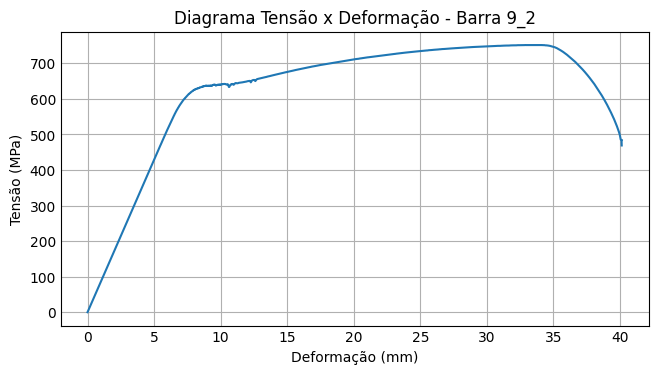

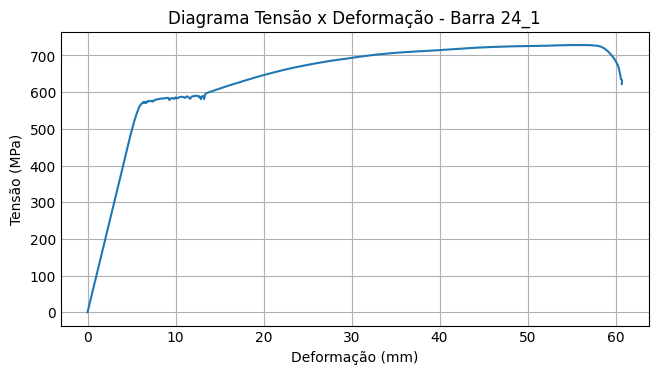

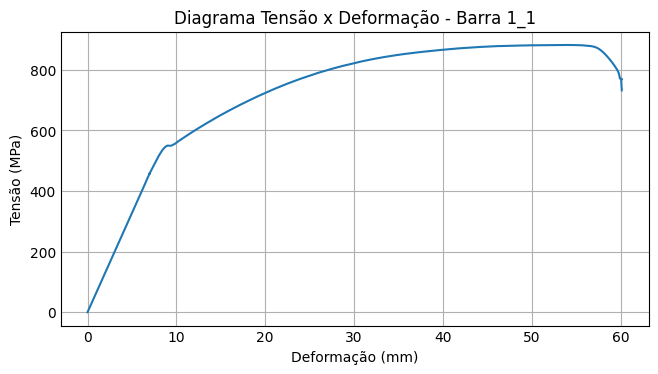

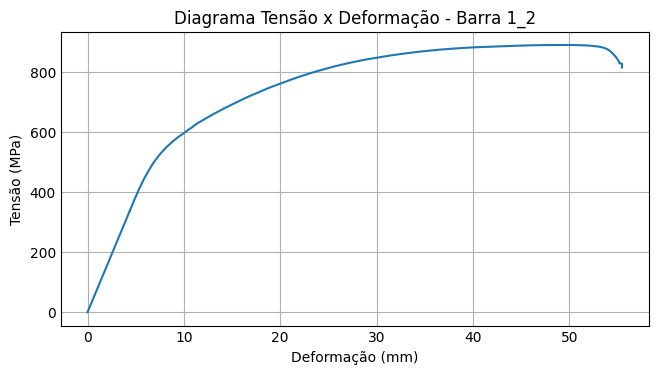

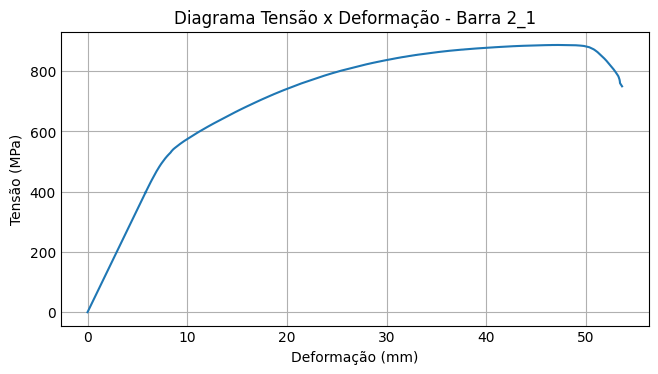

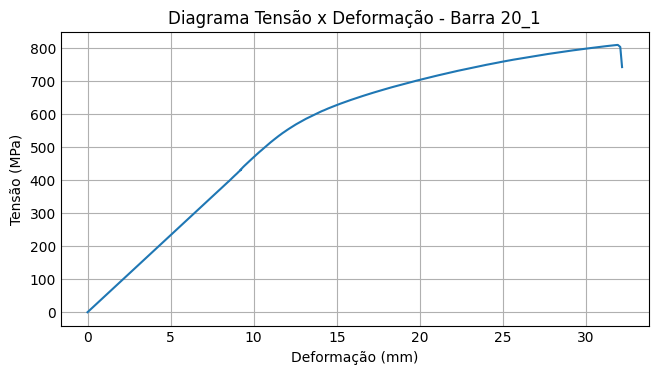

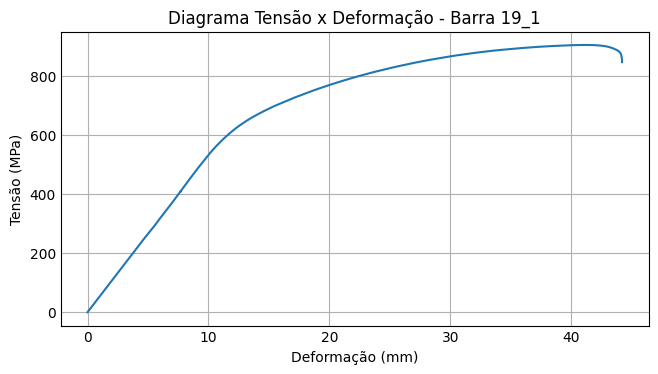

In [10]:
# Loop para chamar a função acima para plotar cada uma das 12 amostras corrigidas
for x in range(12):
    plot_bar(df_t,x)

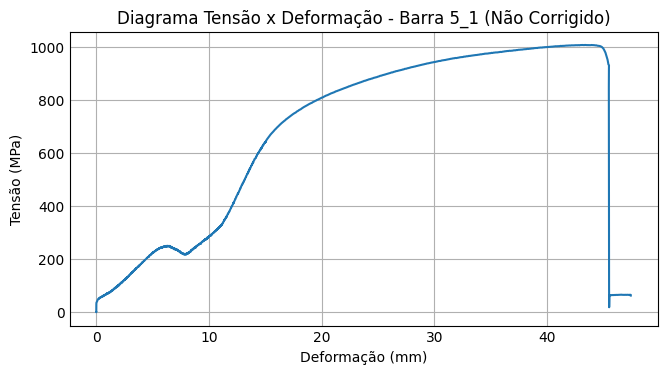

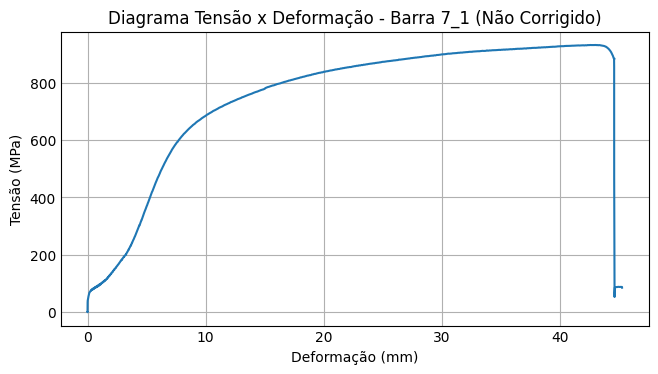

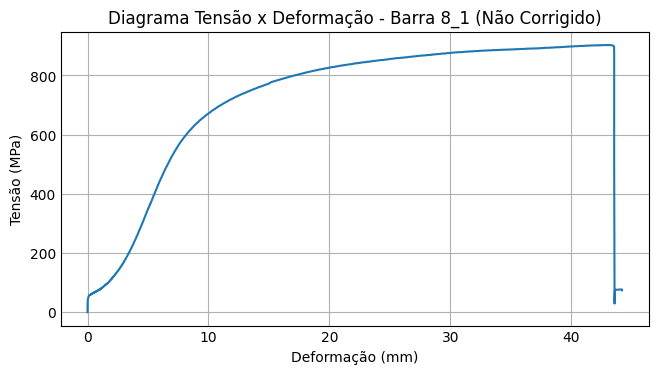

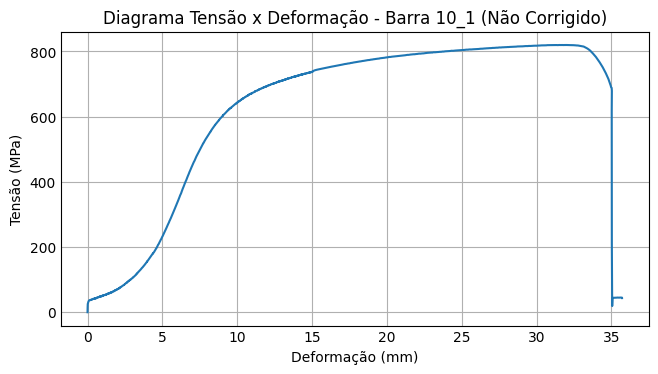

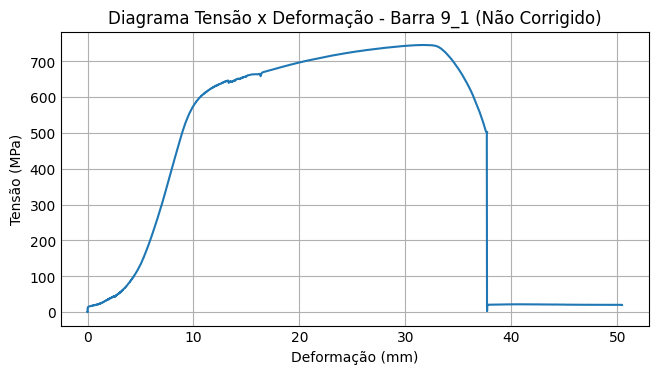

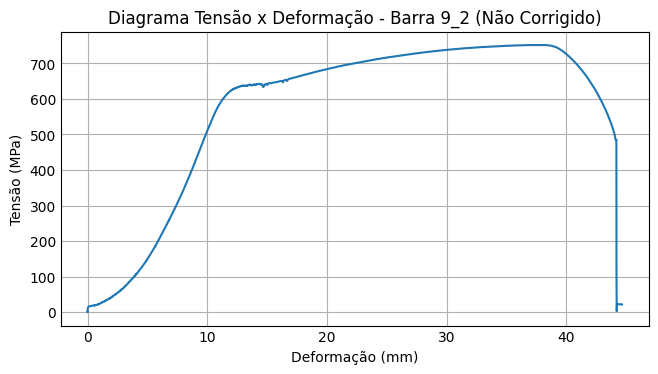

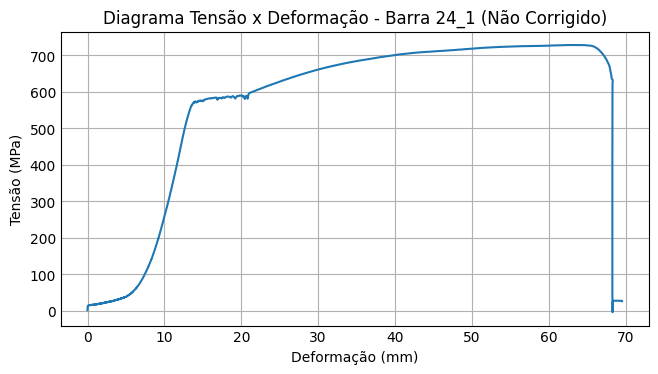

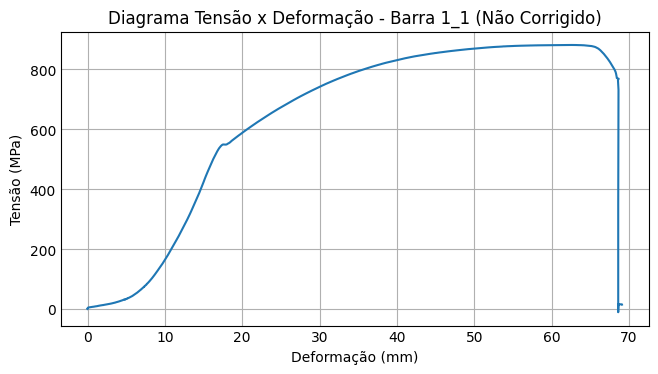

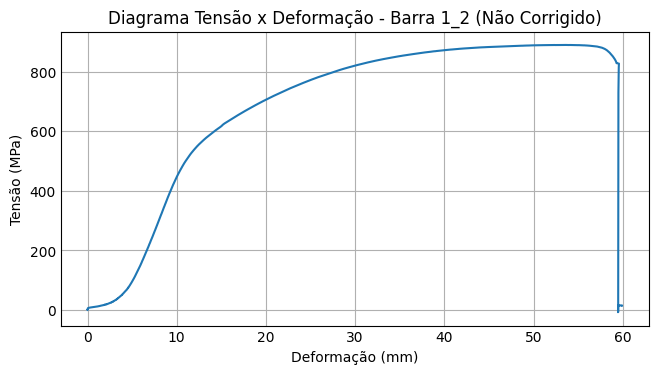

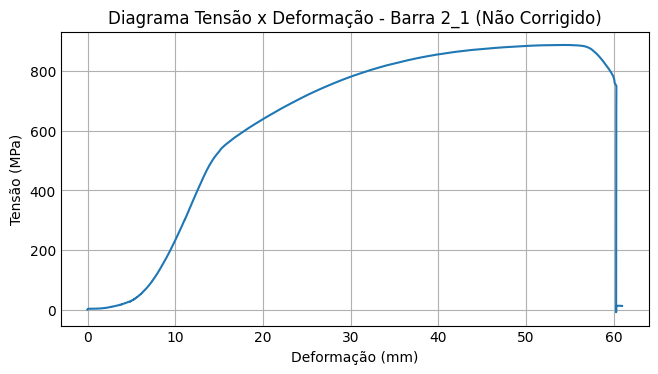

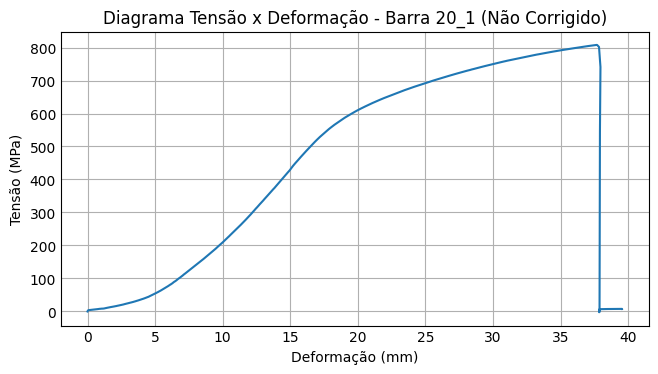

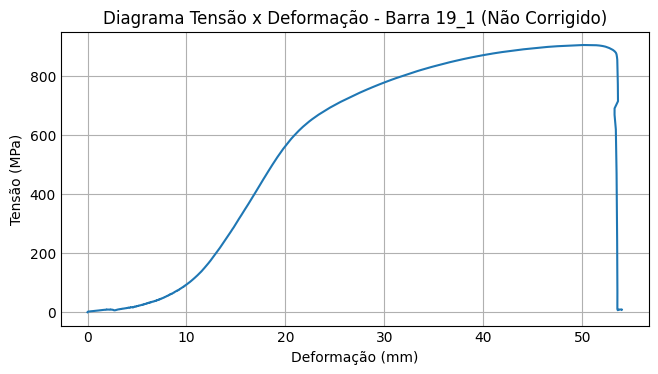

In [11]:
# Loop para chamar a função acima para plotar cada uma das 12 amostras não corrigidas
for x in range(12):
    plot_bar(dfp_t,x,"(Não Corrigido)")

In [12]:
#Função para mapeamento do espectro RGB
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

In [13]:
# Função para plotar grupos de amostras na mesma figura, recebe(dataframe, lista com os índices das amostras a serem plotadas,
# observação com o nome do grupo de amostras, corr True para corrigidas e False para não corrigidas )

def plot_grupo (df, lista, obs="", corr=True):

    plt.style.use('_mpl-gallery')
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111)
    barras = list(df.columns)  

    
    plot_title = "Diagrama Tensão x Deformação - " + obs
    fig_title = str(obs)
    if corr == False:
        plot_title = plot_title + " (Não Corrigido)"
        fig_title = fig_title + "N"    
    
    plt.title(plot_title)
    plt.xlabel("Deformação (mm)")
    plt.ylabel("Tensão (MPa)")

    loop = lista
    color = get_cmap(12)
    legend = []
    cor = [0,6,1,7,2,8,3,9,4,10,5,11]
    
    for x in loop:
        ny = x*2
        nx = ny + 1
        xa = barras[nx]
        ya = barras[ny]
        leg = ya[0:-2]
        legend.append(leg)
        ax.plot(df[xa], df[ya], c=color(cor[x]))
        
    ax.legend(legend)
    
    #Salvando gráfico já nomeado na pasta do código
    fig.savefig(fig_title, bbox_inches="tight")
    plt.show()

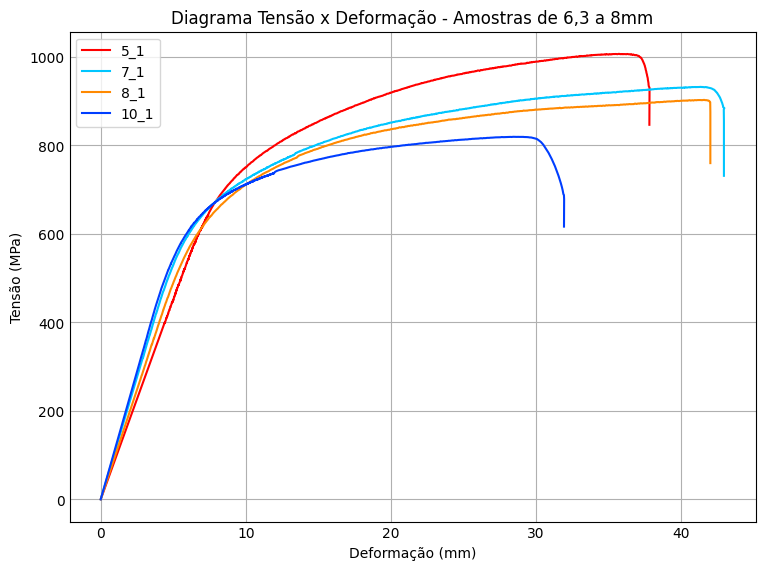

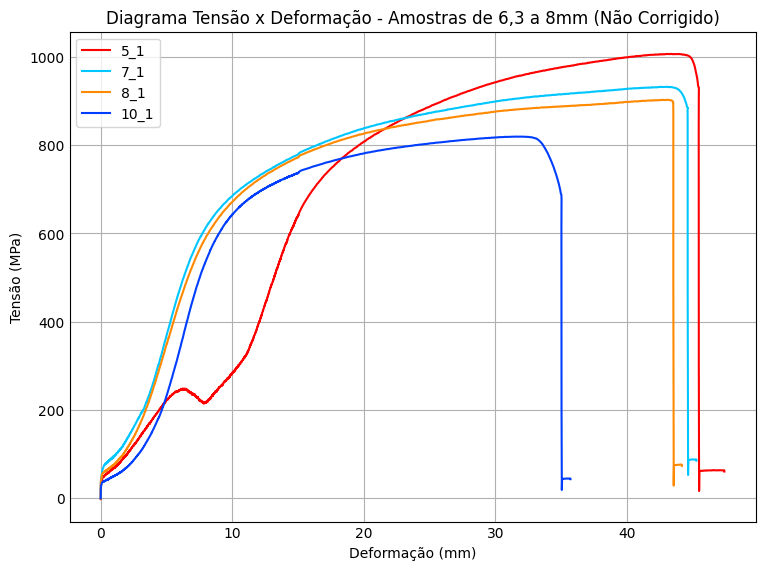

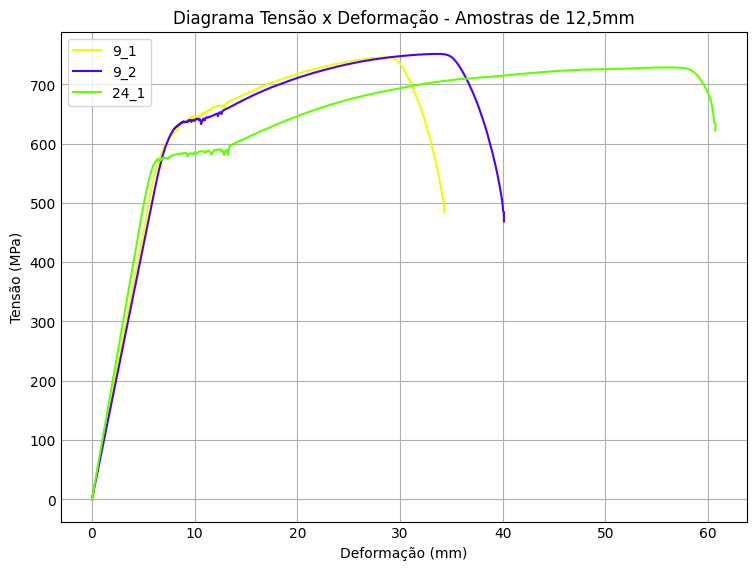

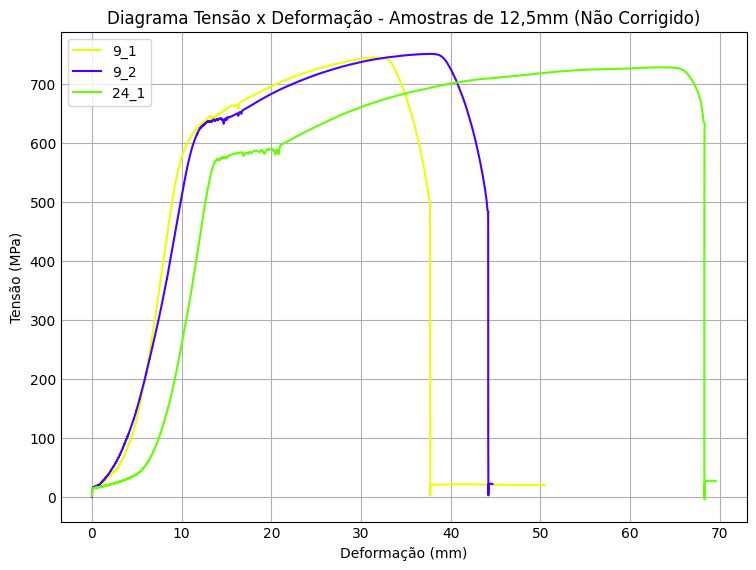

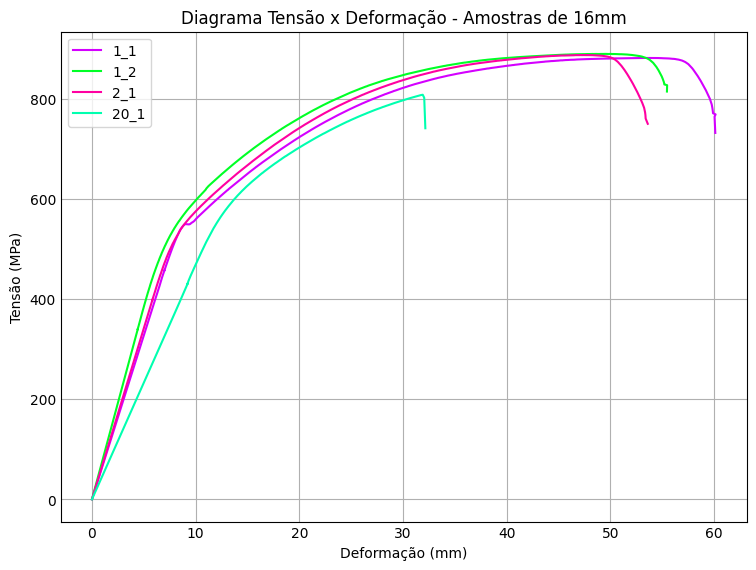

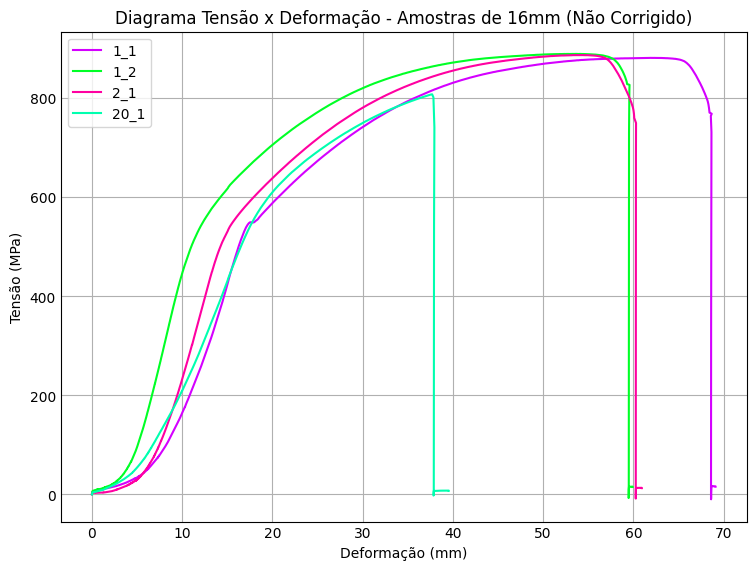

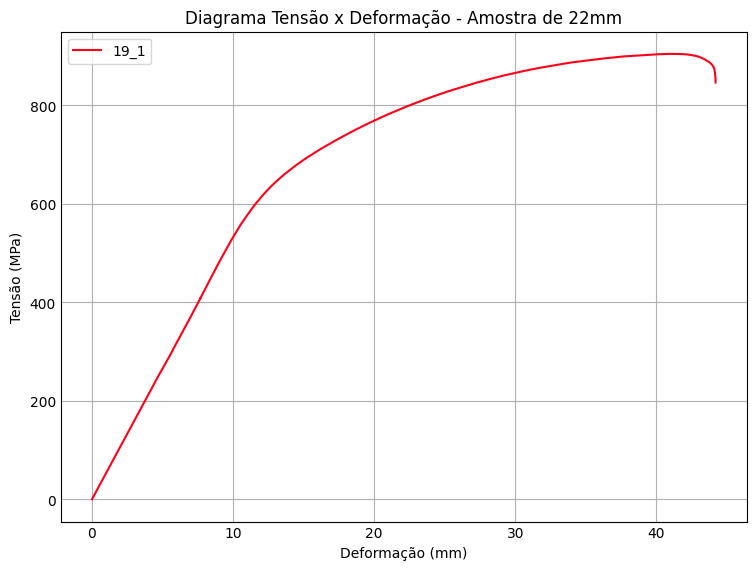

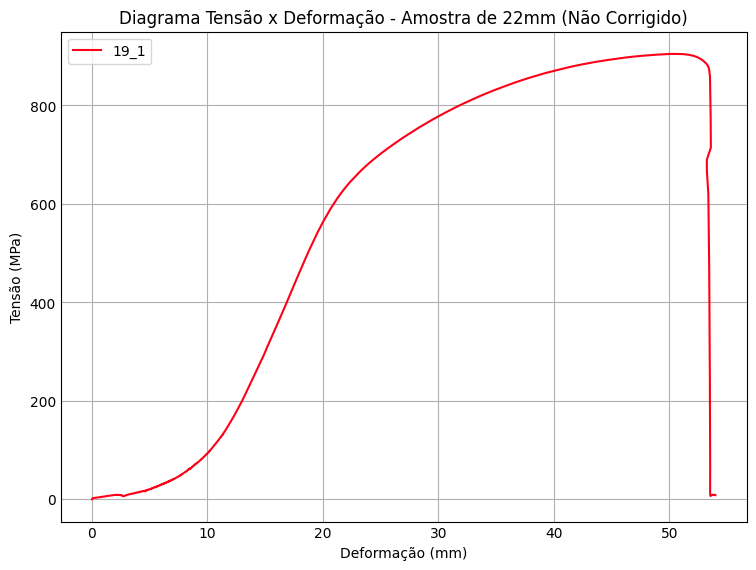

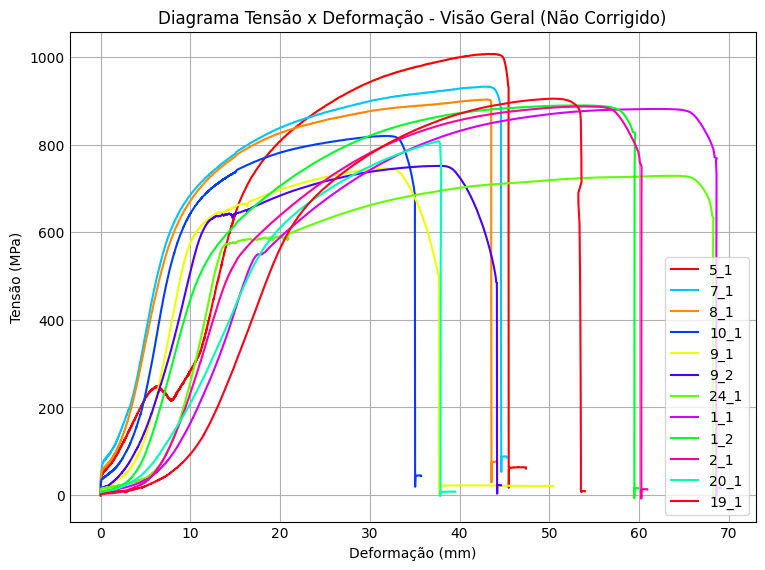

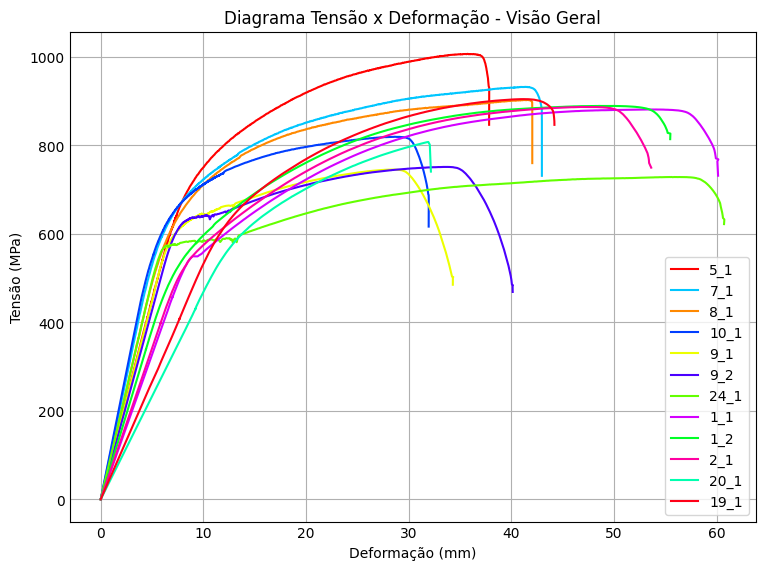

In [14]:
# Chamando a função plot_grupo para cada um dos grupos desejados

plot_grupo(df_t,[0,1,2,3],"Amostras de 6,3 a 8mm")
plot_grupo(dfp_t,[0,1,2,3],"Amostras de 6,3 a 8mm",False)
plot_grupo(df_t,[4,5,6],"Amostras de 12,5mm")
plot_grupo(dfp_t,[4,5,6],"Amostras de 12,5mm",False)
plot_grupo(df_t,[7,8,9,10],"Amostras de 16mm")
plot_grupo(dfp_t,[7,8,9,10],"Amostras de 16mm",False)
plot_grupo(df_t,[11],"Amostra de 22mm")
plot_grupo(dfp_t,[11],"Amostra de 22mm",False)
plot_grupo(dfp_t,[0,1,2,3,4,5,6,7,8,9,10,11],"Visão Geral",False)
plot_grupo(df_t,[0,1,2,3,4,5,6,7,8,9,10,11],"Visão Geral")

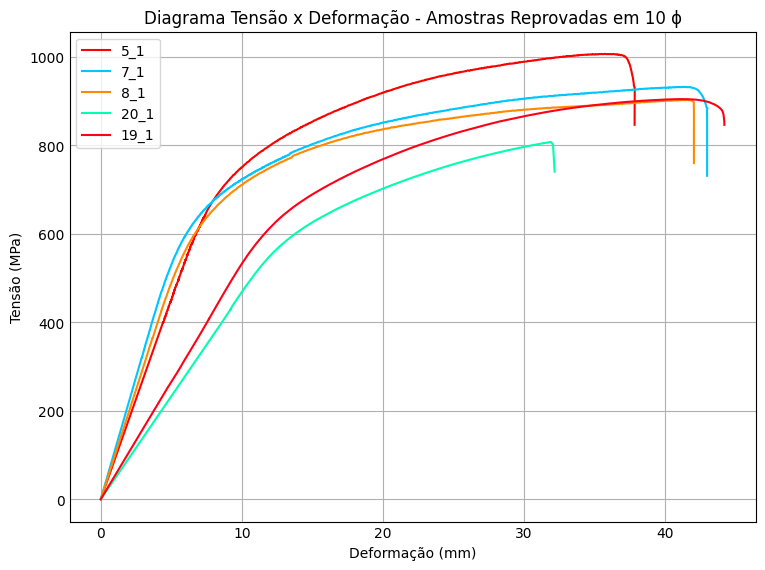

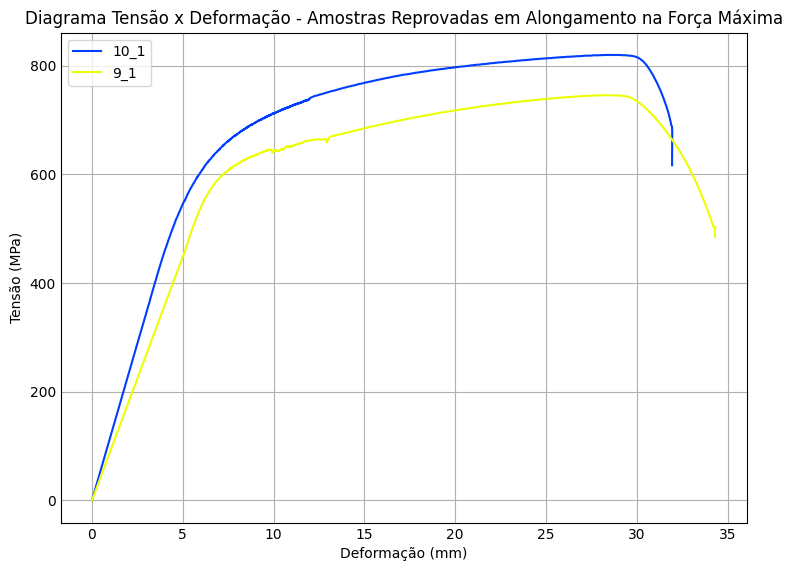

In [15]:
# Chamando a função plot_grupo para os grupos reprovados
plot_grupo(df_t,[0,1,2,10,11],"Amostras Reprovadas em 10 ɸ")
plot_grupo(df_t,[3,4],"Amostras Reprovadas em Alongamento na Força Máxima")